# 8 `IO` 编程 —— 文件操作


- Python 通过操作系统实现读写文件的功能
    - 请求操作系统打开文件对象
    - 利用操作系统提供的接口进行读写操作
    - 请求操作系统关闭文件对象

<span id="mulu8"><font face="黑体" size=6>本章目录</font></span>
* [第八讲 IO编程--文件操作](#8)
    * [8.1 一般文本文件操作](#8.1)
        * [8.1.1 打开文件函数 —— `open`](#8.1.1)
        * [8.1.2 打开文件的模式 —— 参数 `mode`](#8.1.2)
        * [8.1.3 文件对象的常用操作方法](#8.1.3)
        * [8.1.4 文件的关闭](#8.1.4)
        * [8.1.5 文件的指针操作](#8.1.5)
        * [8.1.6 文件的写入](#8.1.6)
        * [8.1.7  `with open as` 文件打开方式](#8.1.7)
    * [8.2 `os`模块 —— 用于文件和文件夹操作](#8.2)
        * [8.2.1 `os`模块简介](#8.2.1)
        * [8.2.2 使用`os`模块进行文件操作](#8.2.2)
        * [8.2.3 使用`os`模块进行文件夹操作](#8.2.3)
    * [8.3 `csv`模块 —— 用于文件操作](#8.3)
        * [8.3.1 `csv`文件读操作](#8.3.1)
        * [8.3.2 `csv`文件写操作](#8.3.2)
        * [8.3.3 `csv`文件读入示例](#8.3.3)
        * [8.3.4 `csv`文件写入示例](#8.3.4)
        * [8.3.5 `csv`文件综合应用示例](#8.3.5)
    * [8.4 二进制文件读取(pickle模块)](#8.4)
    * [8.5 Excel文件读取](#8.5)
    * [8.6 扩展学习 —— 其它读取模块 (自学)](#8.6)


## <font size=5><span id="8.1"> 8.1 一般文本文件操作</span></font>

### <font size=4><span id="8.1.1"> 8.1.1 打开文件函数 —— `open`</span></font>

- 语法
```python
# 常用方式
>>> file_stream = open(file, mode)
# 函数原型
>>> file_stream = open(file, mode='r',
                    buffering=-1, encoding=None, errors=None,
                    newline=None, closefd=True, opener=None)
```


- 功能 —— 打开文件
    - 如果打开成功，则返回<font color="red">文件流对象</font>
    - 如果打开失败，则抛出 `OSError` 异常


- 参数
    - `file` 文本或字符串，给定待打开的文件名，或文件号
    - `mode` 指定打开模式，缺省值为 `r`，表示以只读文本方式打开
    - `encoding` 指定编码方式，缺省值与平台有关，任何 `python` 支持的编码方式都可传入。详见 `codecs` 模块


- 返回值 —— 文件流（`stream`）对象

In [ ]:
# 只读模式打开，返回文件流对象
file = open("files\\tangshi.txt", mode='r')
# file 是个什么东西

In [ ]:
dir(file)

In [ ]:
file.close()

### <font size=4><span id="8.1.2"> 8.1.2  打开文件的模式 —— 参数 `mode`</span></font>

- 记忆要点
    - r —— read 读
    - w —— write 写
    - a —— append 添
    - \+ —— 可读写
    - b —— binary 二进制

#### (1) 打开文件的访问模式

<table>
<thead>
    <tr><th style='text-align:center;' ><strong>访问模式</strong></th><th><strong>说明</strong></th></tr>
</thead>
<tbody>
    <tr><td style='text-align:center;' >r</td><td>以只读方式打开文件。文件的指针将会放在文件的开头。这是默认模式。</td></tr>
    <tr><td style='text-align:center;' >w</td><td>打开一个文件只用于写入。<font color="red">如果该文件已存在则将其覆盖</font>。如果该文件不存在，创建新文件。</td></tr>
    <tr><td style='text-align:center;' >x</td><td>创建一个新文件，并以写入模式将其打开。</td></tr>
    <tr><td style='text-align:center;' >a</td><td>打开文件用于追加。若已存在，指针置于尾部，新内容添加在后。若不存在，创建新文件进行写入。</td></tr>
    <tr><td style='text-align:center;' >b</td><td>以二进制模式打开。</td></tr>
    <tr><td style='text-align:center;' >t</td><td>以文本模式打开（缺省模式）。</td></tr>
    <tr><td style='text-align:center;' >+</td><td>打开文件用于更新，读或写。</td></tr>
    <tr><td style='text-align:center;' >U</td><td>以通用新行(newline)模式打开文件(未来将弃用)。</td></tr>
</tbody>
</table>

#### (2) 打开文件的组合模式

<table>
<thead>
    <tr><th style='text-align:center;' ><strong>组合模式</strong></th><th><strong>说明</strong></th></tr>
</thead>
<tbody>
<tr><td style='text-align:center;' >rb</td><td>以二进制只读模式打开文件，指针置于开头，默认模式。</td></tr>
    <tr><td style='text-align:center;' >wb</td><td>以二进制写入模式打开文件，若已存在则覆盖，若不存在，则建新文件。</td></tr>
    <tr><td style='text-align:center;' >ab</td><td>以二进制追加模式打开文件，若已存在，指针置于结尾，新内容写入在后；若不存在，建新文件进行写入。</td></tr>
    <tr><td style='text-align:center;' >r+</td><td>以读写模式打开文件，指针置于开头。</td></tr>
    <tr><td style='text-align:center;' >w+</td><td>以读写模式打开文件，若已存在则覆盖，若不存在，创建新文件。</td></tr>
    <tr><td style='text-align:center;' >a+</td><td>以追加模式打开文件，若已存在，指针置于结尾；若不存在，创建新文件用于读写。</td></tr>
    <tr><td style='text-align:center;' >rb+</td><td>以二进制读写模式打开文件，指针置于开头。</td></tr>
    <tr><td style='text-align:center;' >wb+</td><td>以二进制读写模式打开文件，若已存在则覆盖；若不存在，创建新文件。</td></tr>
    <tr><td style='text-align:center;' >ab+</td><td>以二进制追加模式打开文件，若已存在，指针置于结尾；若不存在，创建新文件用于读写。</td></tr>
</tbody>
</table>

#### 例 查看文本文件


- files\why_like_python.txt
- files\why_like_python_cn.txt

In [1]:
# 命令查看
!type files\tangshi.txt

《春晓》作者：孟浩然

春眠不觉晓，处处闻啼鸟。
夜来风雨声，花落知多少。 

  


In [2]:
# 命令查看，注意到乱码 (utf8)
!type files\tangshi-cn.txt

銆婃槬鏅撱�嬩綔鑰咃細瀛熸旦鐒�

鏄ョ湢涓嶈�夋檽锛屽�勫�勯椈鍟奸笩銆�
澶滄潵椋庨洦澹帮紝鑺辫惤鐭ュ�氬皯銆�


$$UTF编码$$

<img src = "images\chapter09\utf.jpg" width = 400>

- ANSI
    - ANSI是一种字符代码，为使计算机支持更多语言，通常使用 0x00~0x7f 范围的1 个字节来表示 1 个英文字符。
    - 超出此范围的使用0x80~0xFFFF来编码，即扩展的ASCII编码。
    - 比如：汉字 '中' 在中文操作系统中，使用 [0xD6,0xD0] 这两个字节存储。
    - 不同的国家和地区制定了不同的标准，由此产生了 GB2312、GBK、GB18030、Big5、Shift_JIS 等各自的编码标准。
    - 这些使用多个字节来代表一个字符的各种汉字延伸编码方式，称为 ANSI 编码。
- UTF-8
    - 一种可变长度字符编码
    - 可以用来表示Unicode标准中的任何字符，而且其编码中的第一个字节仍与ASCII相容，使得原来处理ASCII字符的软件无须或只进行少部分修改后，便可继续使用。
    - 成为电子邮件、网页及其他存储或传送文字的应用中，优先采用的编码。

<img src="images\chapter08\encodeing.png">

<img src="images\chapter08\ASCII_utf8_unicode.jpg">

|char|	ANSI(GBK)|	ANSI(Big5)	|ANSI(JIS)|	Unicode	UTF-8|
|-|-|-|-|-|
|文	|0xCEC4|	0xA4E5|	0x95B6|	0x6587|	0xE69687|

- 可以看出，不同ANSI编码之间互不兼容，当信息在国际间交流时，无法将属于两种语言的文字，存储在同一段 ANSI 编码的文本中。需要将不同的ANSI编码都转换成UTF-8编码，进而存储。

##### 怎么才能知道文件的编码呢？
- 使用文本编辑器的功能，以 Visual Studio Code 为例
- 使用chardet模块

In [ ]:
# 演示 VSCode 的使用

In [3]:
# chardet模块的使用

# ---------------------------------------------------
import chardet
file = open(r"files\tangshi-cn.txt", mode='rb')
data = file.read()
file.close()
result = chardet.detect(data)
# ---------------------------------------------------
# 以上代码都不要做任何改动，只替换文件路径

print(result) 

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [98]:
# 自动化
file = open(r"files\tangshi-cn.txt", mode='r', encoding=result['encoding'])
print(file.read())
file.close()

《春晓》作者：孟浩然

春眠不觉晓，处处闻啼鸟。
夜来风雨声，花落知多少。


In [4]:
print(file)

<_io.BufferedReader name='files\\tangshi-cn.txt'>


### <font size=4><span id="8.1.3"> 8.1.3 文件对象的常用操作方法</span></font>

- 最常用的方法如下表



<figure>
<table>
<thead>
    <tr><th>文件对象方法</th><th>执行操作</th></tr>
</thead>
    
<tbody>
    <tr><td>close()</td><td>关闭文件</td></tr>
    <tr><td>read(size == -1)</td><td>从文件读取size个字符，<br>当未给定size或给定负值的时候，读取剩余的所有字符，然后作为字符串返回</td></tr>
    <tr><td>readline()</td><td>从文件中读取一行字符串</td></tr>
    <tr><td>readlines()</td><td>从文件中读取多行字符串</td></tr>
    <tr><td>write(str)</td><td>将字符串 str 写入文件</td></tr>
    <tr><td>writelines(seq)</td><td>向文件写入字符串序列seq，seq应该是一个返回字符串的可迭代对象</td></tr>
    <tr><td>seek(offset, from)</td><td>在文件中移动文件指针，<br>从from(0代表文件头部，1代表当前位置，2代表文件末尾)偏移offset个字节</td></tr>
    <tr><td>tell()</td><td>返回当前在文件中的位置</td></tr>
</tbody>
</table>
</figure>


- 了解全部的方法，运行
```python
>>> dir(file)
```

#### 8.1.3.1 读全部行函数 —— `readlines`


- 语法
```python
>>> file.readlines()
```


- 功能 —— 返回所有行组成的列表

In [13]:
# ANSI 编码
file = open("files\\why_like_poem.txt", mode='r')

for line in file.readlines():
   print(line, end="")

Before my bed a pool of night;
Can it be hoarfrost on the ground?
Looking up, I find the moon night;
Bowing, in homesickness I'm drowned.

In [14]:
# 单独执行 readlines，竟然输出空列表，为什么？
file.readlines()

[]

In [15]:
# 关闭文件
file.close()

In [16]:
# 重新打开
file = open("files\\why_like_poem.txt", mode='r')

In [17]:
# 单独执行 readlines，这次没有输出空列表，又为什么？
file.readlines()

['Before my bed a pool of night;\n',
 'Can it be hoarfrost on the ground?\n',
 'Looking up, I find the moon night;\n',
 "Bowing, in homesickness I'm drowned."]

In [18]:
# 记住关闭文件是好习惯！！！
file.close()

- 说明 —— open 文件操作后返回的文件流对象中，含有一个位置指针

#### 8.1.3.2 逐次读单行函数 —— readline


- 语法
```python
>>> file.readline()
```


- 功能 —— 从文件指针当前所指位置处，读一单行


- 注意：文件指针隐性起作用

In [19]:
file_cn = open("files\\tangshi-cn.txt", mode='r', encoding="UTF-8")

In [20]:
# 读第一行文本
file_cn.readline()

'《春晓》作者：孟浩然\n'

In [21]:
# 读第二行文本
file_cn.readline()

'\n'

In [22]:
# 读第三行文本
file_cn.readline()

'春眠不觉晓，处处闻啼鸟。\n'

In [23]:
# 关闭文件，好习惯！
file_cn.close()

#### 8.1.3.3 逐次读单行函数 —— read


- 语法
```python
>>> file.read(n=-1)
```


- 功能 —— 按字节读取，如果不设置参数，那么会全部读进来，直到文件末尾


In [24]:
file_cn = open("files\\tangshi-cn.txt", mode='r', encoding="UTF-8")
file_cn.read()

'《春晓》作者：孟浩然\n\n春眠不觉晓，处处闻啼鸟。\n夜来风雨声，花落知多少。'

In [45]:
file_cn.close()

In [46]:
file_cn = open("files\\tangshi-cn.txt", mode='r', encoding="UTF-8")
file_cn.read(10)

'《春晓》作者：孟浩然'

In [47]:
file_cn.close()

### <font size=4><span id="8.1.4"> 8.1.4 文件的关闭</span></font>

- 调用 `close` 函数
```python
>>> file.close()
```


- 打开文件后，一定要记着关闭，这是好习惯，切记！！！

### <font size=4><span id="8.1.5">8.1.5 文件的指针操作</span></font>

#### (1) 文件指针查询


- 语法
```python
>>> file.tell()
```

- 参数 —— 无


- 功能 —— 返回当前文件流的位置

#### 例  文件指针查询

In [2]:
file = open("files\\why_like_poem.txt") # 只读方式打开文件
list(file)

['Before my bed a pool of night;\n',
 'Can it be hoarfrost on the ground?\n',
 'Looking up, I find the moon night;\n',
 "Bowing, in homesickness I'm drowned."]

In [26]:
# 查询文件指针位置，在文件首
file.tell()

0

In [27]:
# 读第一行，输出行内容与长度
line = file.readline()
print(line)
print(len(line))

Before my bed a pool of night;

31


In [28]:
# 再查询文件指针位置，有了变化
file.tell()

32

In [29]:
# 读第二行，输出行内容与长度
line = file.readline()
print(line)
print(len(line))

Can it be hoarfrost on the ground?

35


In [30]:
# 再查询文件指针位置，注意变化规律，换行符的隐性作用
file.tell()

68

In [61]:
# 读剩下的内容
file.read()     # 按字节读取，如果不设置参数，那么会全部读进来，直到文件末尾

"Looking up, I find the moon night;\nBowing, in homesickness I'm drowned."

In [62]:
# 再查询文件指针位置，应该到了末位
file.tell()

140

In [63]:
# 试图再读到文件末尾
file.read() 

''

In [64]:
file.tell()

140

In [31]:
# 关闭文件
file.close()

#### (2) 文件指针定位

- 语法
```python
>>> file.seek(offset, from=0)
```


- 功能 —— 改变文件指针位置


- 参数
    - offset 偏移量
    - from
        - 0 相对文件头
        - 1 相对当前位置
        - 2 相对文件尾
        
- 注意
    - 如果 `from != 0`，`offset` 必须为零，这是 `Python 3.X` 的限制

#### 例 文件指针定位 —— from 为零


- 从文件头部偏移

In [32]:
file = open("files\\why_like_poem.txt") # 只读方式打开文件
file.tell() # 查询文件指针位置，在文件首

0

In [33]:
line = file.readline() # 读第一行，输出行内容与长度
print(line)
print(len(line))

Before my bed a pool of night;

31


In [34]:
file.tell()  # 再查询文件指针位置，有了变化

32

In [35]:
file.seek(7,  # 偏移 7 个字节
          0)  # 文件头部
file.tell() # 再查询文件指针位置，有了变化

7

In [36]:
line = file.readline()  # 重读第一行，从第 7 字节开始
print(line)             # 输出行内容与长度
print(len(line))

my bed a pool of night;

24


In [71]:
file.close()

#### 例 文件指针定位 —— from 非零时


- 注意 `Python 3.X` 不能相对当前位置(from==1)或尾部位置(from==2)位移进行非零偏移
    - 即 from 非零时，offset 不能取非零值


- 问题 —— 如何变通？

In [72]:
file = open("files\\why_like_poem.txt") # 只读方式打开文件
file.tell()  # 查询文件指针位置，在文件首

0

In [73]:
line = file.readline()  # 读第一行，输出行内容与长度
print(line)
print(len(line))

Before my bed a pool of night;

31


In [74]:
file.tell()  # 查询文件指针位置，不在文件头部

32

In [ ]:
file.seek(-10, 1)   # 报错：试图将文件指针从当前位置，前移 10 个字节

In [75]:
current_position = file.tell()          # 取得文件指针位置
offset = 10
file.seek(current_position-offset-1, 0) # 变通前移 10 个字节

21

In [76]:
line = file.readline()
print(line)
print(len(line))

of night;

10


In [77]:
file.close()

#### 例  实用技巧 —— 相对当前位置或文件末尾偏移若干字节


- 试图从当前位置向前偏移 `offset` 字节
```python
>>> file.seek(file.seek(0,1)-offset, 0)
```


- 试图从文件末尾向前偏移 `offset` 字节
```python
>>> file.seek(file.seek(0,2)-offset, 0)
```

In [ ]:
file = open("files\\why_like_poem.txt") # 只读方式打开文件

In [ ]:
file.readline()

In [ ]:
# 当前位置向前偏移 7 个字节

file.seek(file.seek(0,1)-7, 0)
file.readline()

In [ ]:
file.close()

#### 例  文件定位 —— 获取文件长度的另类方法


- 语法
```python
>>> file.seek(0, 2) - file.seek(0, 0)
```

In [78]:
!dir files\why_like_poem.txt

 驱动器 X 中的卷是 Shared Folders

 X:\Documents\Python\2024SpringCivil\files 的目录

2024/04/25  21:53               140 why_like_poem.txt
               1 个文件            140 字节
               0 个目录 638,043,492,352 可用字节


In [79]:
file = open("files\\why_like_poem.txt") # 只读方式打开文件

In [80]:
file.seek(0, 2) - file.seek(0, 0)

140

In [81]:
file.close()

####  文件的读入案例之一：包罗万象的$\pi$

In [37]:
pifile = open("files\\pi20w.txt", encoding="UTF-8")

In [38]:
content = pifile.read()
print(content)

1415926535　8979323846　2643383279　5028841971　6939937510　5820974944　5923078164　0628620899　8628034825　3421170679　8214808651　3282306647　0938446095　5058223172　5359408128　4811174502　8410270193　8521105559　6446229489　5493038196　4428810975　6659334461　2847564823　3786783165　2712019091　4564856692　3460348610　4543266482　1339360726　0249141273　7245870066　0631558817　4881520920　9628292540　9171536436　7892590360　0113305305　4882046652　1384146951　9415116094　3305727036　5759591953　0921861173　8193261179　3105118548　0744623799　6274956735　1885752724　8912279381　8301194912　9833673362　4406566430　8602139494　6395224737　1907021798　6094370277　0539217176　2931767523　8467481846　7669405132　0005681271　4526356082　7785771342　7577896091　7363717872　1468440901　2249534301　4654958537　1050792279　6892589235　4201995611　2129021960　8640344181　5981362977　4771309960　5187072113　4999999837　2978049951　0597317328　1609631859　5024459455　3469083026　4252230825　3344685035　2619311881　7101000313　7838752886　5875332083　8142061717　7669147303　5982534904

In [39]:
pifile.close()

In [40]:
content = content.replace(' ','')
content

'1415926535\u30008979323846\u30002643383279\u30005028841971\u30006939937510\u30005820974944\u30005923078164\u30000628620899\u30008628034825\u30003421170679\u30008214808651\u30003282306647\u30000938446095\u30005058223172\u30005359408128\u30004811174502\u30008410270193\u30008521105559\u30006446229489\u30005493038196\u30004428810975\u30006659334461\u30002847564823\u30003786783165\u30002712019091\u30004564856692\u30003460348610\u30004543266482\u30001339360726\u30000249141273\u30007245870066\u30000631558817\u30004881520920\u30009628292540\u30009171536436\u30007892590360\u30000113305305\u30004882046652\u30001384146951\u30009415116094\u30003305727036\u30005759591953\u30000921861173\u30008193261179\u30003105118548\u30000744623799\u30006274956735\u30001885752724\u30008912279381\u30008301194912\u30009833673362\u30004406566430\u30008602139494\u30006395224737\u30001907021798\u30006094370277\u30000539217176\u30002931767523\u30008467481846\u30007669405132\u30000005681271\u30004526356082\u30007785771

In [41]:
content = content.replace('\n','')
content

'1415926535\u30008979323846\u30002643383279\u30005028841971\u30006939937510\u30005820974944\u30005923078164\u30000628620899\u30008628034825\u30003421170679\u30008214808651\u30003282306647\u30000938446095\u30005058223172\u30005359408128\u30004811174502\u30008410270193\u30008521105559\u30006446229489\u30005493038196\u30004428810975\u30006659334461\u30002847564823\u30003786783165\u30002712019091\u30004564856692\u30003460348610\u30004543266482\u30001339360726\u30000249141273\u30007245870066\u30000631558817\u30004881520920\u30009628292540\u30009171536436\u30007892590360\u30000113305305\u30004882046652\u30001384146951\u30009415116094\u30003305727036\u30005759591953\u30000921861173\u30008193261179\u30003105118548\u30000744623799\u30006274956735\u30001885752724\u30008912279381\u30008301194912\u30009833673362\u30004406566430\u30008602139494\u30006395224737\u30001907021798\u30006094370277\u30000539217176\u30002931767523\u30008467481846\u30007669405132\u30000005681271\u30004526356082\u30007785771

In [42]:
content = content.replace('\u3000','')
content

'141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195909216420198

In [ ]:
len(content)  # 

In [43]:
#你的出生月日在pi里面么？
md = input("输入你的生日的月日0000格式：")
if content.find(md) > 0:
    print("Congratulations!")
else:
    print("Sorry")

输入你的生日的月日0000格式： 0120


Congratulations!


In [ ]:
# 验证任意一个四位数都在pi里面出现

In [44]:
for each in range(1000,9999): #try 10000~99999
    if content.find(str(each))< 0:
        print(str(each)+" is not included")
        break
else:
    print("All number from 1000 to 9999 are include in PI")

All number from 1000 to 9999 are include in PI


In [45]:
dictA = {}
for i in range(1000,10000):
    dictA[i] = content.count(str(i))

In [89]:
dictA.values()

dict_values([23, 25, 21, 28, 26, 17, 18, 25, 12, 19, 28, 25, 20, 19, 20, 23, 15, 33, 15, 21, 20, 25, 12, 22, 27, 16, 17, 17, 17, 24, 19, 17, 31, 19, 27, 25, 18, 15, 15, 15, 23, 18, 28, 15, 22, 21, 17, 21, 28, 24, 17, 21, 19, 20, 20, 25, 24, 25, 25, 24, 27, 16, 15, 16, 27, 25, 25, 15, 19, 12, 17, 17, 20, 29, 23, 15, 26, 23, 20, 19, 16, 23, 18, 9, 21, 18, 20, 29, 16, 20, 24, 23, 16, 19, 24, 21, 28, 20, 26, 20, 12, 19, 17, 20, 24, 24, 12, 23, 14, 20, 18, 22, 13, 31, 23, 26, 17, 21, 26, 21, 26, 18, 33, 22, 22, 22, 25, 11, 11, 24, 21, 22, 18, 25, 26, 22, 15, 25, 24, 25, 27, 25, 13, 22, 21, 16, 22, 23, 16, 25, 24, 22, 20, 21, 26, 23, 18, 16, 13, 18, 18, 24, 27, 17, 24, 14, 13, 22, 18, 11, 14, 20, 19, 19, 17, 24, 24, 28, 27, 22, 15, 16, 22, 29, 24, 17, 27, 13, 13, 23, 19, 26, 13, 21, 30, 19, 21, 19, 20, 21, 12, 27, 23, 14, 15, 15, 23, 23, 19, 26, 28, 16, 24, 15, 16, 14, 14, 17, 22, 19, 17, 23, 22, 22, 24, 12, 19, 16, 17, 17, 17, 22, 17, 12, 17, 17, 16, 25, 19, 23, 17, 19, 22, 20, 28, 24, 17, 

In [90]:
dictA.keys()

dict_keys([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164,

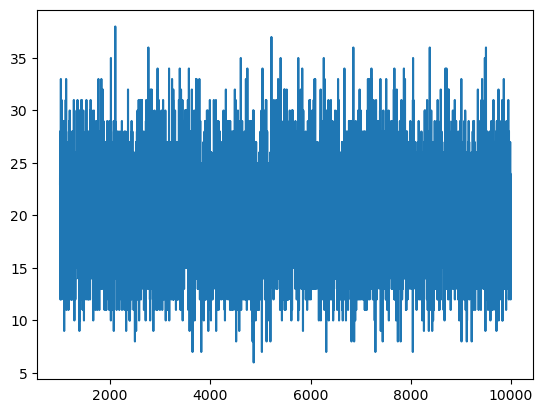

In [91]:
import matplotlib.pyplot as plt
plt.plot(list(dictA.keys()),list(dictA.values()))
plt.show()

####  文件的读入案例之二：汉字

In [46]:
hzfile = open("files\\hanzi_pinyin_bihua.txt")

In [47]:
for each in range(3):
    hzline = hzfile.readline()
hz_content = hzfile.readlines()

In [94]:
hz_content

['一        yi        1        \n',
 '丁        ding      2        \n',
 '丂        yu        2        \n',
 '七        qi        2        \n',
 '丄        shang     2        \n',
 '丅        xia       2        \n',
 '丆        myeon     2        \n',
 '万        wan       3        \n',
 '丈        zhang     3        \n',
 '三        san       3        \n',
 '上        shang     3        \n',
 '下        xia       3        \n',
 '丌        ji        3        \n',
 '不        bu        4        \n',
 '与        yu        3        \n',
 '丏        mian      4        \n',
 '丐        gai       4        \n',
 '丑        chou      4        \n',
 '丒        chou      4        \n',
 '专        zhuan     4        \n',
 '且        qie       5        \n',
 '丕        pi        5        \n',
 '世        shi       5        \n',
 '丗        shi       5        \n',
 '丘        qiu       5        \n',
 '丙        bing      5        \n',
 '业        ye        5        \n',
 '丛        cong      5        \n',
 '东        dong     

In [ ]:
hzfile.close()

In [48]:
hz,py,bh = [],[],[]
for each in hz_content:
    a, b, c = each.split()
    hz.append(a)
    py.append(b)
    bh.append(c)

In [49]:
print(hz) # 很慢

['一', '丁', '丂', '七', '丄', '丅', '丆', '万', '丈', '三', '上', '下', '丌', '不', '与', '丏', '丐', '丑', '丒', '专', '且', '丕', '世', '丗', '丘', '丙', '业', '丛', '东', '丝', '丞', '丟', '丠', '両', '丢', '丣', '两', '严', '並', '丧', '丨', '丩', '个', '丫', '丬', '中', '丮', '丯', '丰', '丱', '串', '丳', '临', '丵', '丶', '丷', '丸', '丹', '为', '主', '丼', '丽', '举', '丿', '乀', '乁', '乂', '乃', '乄', '久', '乆', '乇', '么', '义', '乊', '之', '乌', '乍', '乎', '乏', '乐', '乑', '乒', '乓', '乔', '乕', '乖', '乗', '乘', '乙', '乚', '乛', '乜', '九', '乞', '也', '习', '乡', '乢', '乣', '乤', '乥', '书', '乧', '乨', '乩', '乪', '乫', '乬', '乭', '乮', '乯', '买', '乱', '乲', '乳', '乴', '乵', '乶', '乷', '乸', '乹', '乺', '乻', '乼', '乽', '乾', '乿', '亀', '亁', '亂', '亃', '亄', '亅', '了', '亇', '予', '争', '亊', '事', '二', '亍', '于', '亏', '亐', '云', '互', '亓', '五', '井', '亖', '亗', '亘', '亙', '亚', '些', '亜', '亝', '亞', '亟', '亠', '亡', '亢', '亣', '交', '亥', '亦', '产', '亨', '亩', '亪', '享', '京', '亭', '亮', '亯', '亰', '亱', '亲', '亳', '亴', '亵', '亶', '亷', '亸', '亹', '人', '亻', '亼', '亽', '亾', '亿', '什', '仁', '仂', '仃', '仄', '仅', '仆', '仇',

In [50]:
hz1 = input("输入一个汉字，找出跟他一样读音的汉字有哪些？")

输入一个汉字，找出跟他一样读音的汉字有哪些？ 王


In [51]:
for i in range(len(hz)):
    if hz[i]==hz1:
        hz_duying = py[i]
        hz_bihua = bh[i]
        break;
print("读\"{0}\"的汉字有：".format(hz_duying))
count = 0
for i in range(len(py)):
    if py[i] == hz_duying:
        print(hz[i],end="")
        count += 1
print("\n共有{0}个汉字与\"{1}\"的读音相同".format(count-1,hz1))

读"wang"的汉字有：
亡仼妄尩尪尫彺往徃徍忘忹惘抂旺暀朚望朢枉棢汪瀇焹王琞盳網网罔莣菵蚟蛧蝄誷輞辋迋魍
共有39个汉字与"王"的读音相同


### <font size=4><span id="8.1.6">8.1.6 文件的写入</span></font>

- 注意
    - 若使用 `w` 模式，此前文件内容会全部被覆盖
    - 若想追加输出，应采用 `a` 模式

#### 例  向文件写或追加内容

In [56]:
file_out = open("files\\output.txt","w")
file_out.write("时间过得好快\n已经第二学期了！\n")
file_out.close()

In [57]:
!type files\output.txt

时间过得好快
已经第二学期了！


In [58]:
file_out = open("files\\output.txt","a")    # 以追加模式重新打开文件
file_out.write("今天是2024年04月28日\n")
file_out.close()

In [59]:
!type files\output.txt

时间过得好快
已经第二学期了！
今天是2024年04月28日


####  文件的写入案例之一：客户和密码
- 编写一个程序， 提示用户输入其名字； 
- 用户作出响应后， 将其名字写入到文件guest.txt中。

In [66]:
#程序准备.........................
guest = open("files\\guest.txt","a+")
!type files\guest.txt

bbb BBB
bb bb
aa aa
aaa AAA
zzz zzz
xyz xyz
pan aaa


In [62]:
guest.seek(0, 0)  #没有这句会怎么样？
guest_password = guest.readlines()
print(guest_password)

['bbb BBB\n', 'bb bb\n', 'aa aa\n', 'aaa AAA\n', 'zzz zzz\n', 'xyz xyz\n']


In [63]:
guest.close()

In [64]:
guest = {}
for each in guest_password:
    a, b = each.split()
    guest[a] = b
guest

{'bbb': 'BBB',
 'bb': 'bb',
 'aa': 'aa',
 'aaa': 'AAA',
 'zzz': 'zzz',
 'xyz': 'xyz'}

In [ ]:
#程序准备
#程序准备over.........................
# 提示用户输入姓名，如果已存在，则提示输入密码，密码正确这提示“登录成功”
# 否则提示“密码不正确”
# 如果用户名不存在，则提示“用户名不存在”

In [65]:
guest_file = open("files\\guest.txt","a+")
guest_file.seek(0, 0)  #没有这句会怎么样？
guest_password = guest_file.readlines()
guest_file.close()
guest = {}
for each in guest_password:
    a, b = each.split()
    guest[a]=b

name = input("请输入用户名：")
if name in guest.keys():
    mima = input("请输入密码：")
    if mima == guest[name]:
        print("{0},欢迎您,\n登陆成功！".format(name))
    else:
        print("{0},密码输入错误！".format(name))
else:
    print("用户名{0}不存在,请输入密码创建新用户".format(name))
    mima = input("请输入密码：")
    print("用户创建成功，请您记住用户名和密码！")
    # 更新用户名和密码文件
    guest = open("files\\guest.txt","a+")
    guest.write(name+' '+mima+'\n')
    guest.close()

请输入用户名： pan


用户名pan不存在,请输入密码创建新用户


请输入密码： aaa


用户创建成功，请您记住用户名和密码！


### <font size=4><span id="8.1.7">8.1.7  `with open as` 文件打开方式</span></font>

- 背景 —— 虽然一再强调要关闭打开的文件，可是许多程序员
    - 经常忘记关闭打开的文件
    - 或者是已经关闭的文件，神经质地再次关闭


- 怎么办？ —— 采用 `with open as` 文件打开方式时
    - 将在代码块结束后，自动调用 `file.close()`

#### 例  使用 `with open as` 方式打开文件的例子

In [67]:
with open("files\\why_like_poem.txt") as file:  # 自动调用file.close()
    for each_line in file:
        print("文件关闭了" if file.closed else "文件尚未关闭")
        print(each_line, end='')

文件尚未关闭
Before my bed a pool of night;
文件尚未关闭
Can it be hoarfrost on the ground?
文件尚未关闭
Looking up, I find the moon night;
文件尚未关闭
Bowing, in homesickness I'm drowned.

In [68]:
print("文件关闭了" if file.closed else "文件尚未关闭")  #测试文件是否关闭

文件关闭了


## <font size=5><span id="8.2"> 8.2 `os`模块 —— 用于文件和文件夹操作</span></font>

### <font size=4><span id="8.2.1">8.2.1 `os`模块简介</span></font>

- os模块是python标准库中的一个用于访问操作系统功能的模块
- os模块的主要功能：
    - 系统相关操作
    - 目录及文件操作
    - 执行命令
- os模块提供了其他操作系统接口，可以实现跨平台访问
- 官方文档：https://docs.python.org/3/library/os.html

### <font size=4><span id="8.2.2">8.2.2 使用`os`模块进行文件操作</span></font>

##### 常用函数

| 名称 | 用途 |
| :-----| :----|
|os.path.exists|判断文件是否存在|
|os.remove|删除文件|
|os.unlink|删除文件|
|os.rename|重命名文件|
|os.path.isfile|判断是否是文件|格 |


#### 例  更稳妥的创建文件方式
- 使用open(file,'w')这种方式创建文件时，如果已经存在一个同名文件，则会自动清空这个文件的全部内容，这存在误操作的风险
- 可以使用os.path.exists来建立一种更为稳妥的创建文件方法
- os.path.exists也可用来判断文件夹是否存在

In [2]:
import os
file_path = "new_file.txt"
if not os.path.exists(file_path):
    open(file_path, "w").close()
    print(f"文件 {file_path} 创建成功")
else:
    print(f"文件 {file_path} 已存在")

文件 new_file.txt 创建成功


#### 例  删除文件的两种方式
- os.remove
- os.unlink
- 两者只能用于删除文件
- 两者实际上是同一个函数的两个不同名称

In [3]:
import os
os.remove('test.txt')    # 文件不存在会报错

FileNotFoundError: [WinError 2] 系统找不到指定的文件。: 'test.txt'

In [4]:
import os
os.unlink('test.txt')     # 文件不存在会报错

FileNotFoundError: [WinError 2] 系统找不到指定的文件。: 'test.txt'

### <font size=4><span id="8.2.3">8.2.3 使用`os`模块进行文件夹操作</span></font>

##### 常用函数

| 名称 | 用途 |
| :-----| :----|
|os.getcwd|获取当前文件夹的路径|
|os.path.join|文件夹路径拼接|
|os.listdir|列出当前文件夹下所有的文件和文件夹|
|os.scandir|查询文件夹中的文件|
|os.path.isdir|判断是否是文件夹|
|os.mkdir|创建单层文件夹|
|os.makedirs|创建多层文件夹|
|os.rename|重命名文件夹|

#### 例 获取当前文件夹的路径

In [5]:
import os
print(os.getcwd())

\\Mac\Home\Documents\Python\2024SpringCivil


#### 例 文件夹路径拼接
- windows下，目录用 \ 分割
- linux/mac下，目录用 / 分割
- 如何保证代码能够适用于多个平台？

In [6]:
import os
os.path.join('MyApp', 'service')    # 具体结果区别于操作系统

'MyApp\\service'

#### 例 查询文件信息
- (st_mode, st_ino, st_dev, st_nlink, st_uid, st_gid, st_size, st_atime, st_mtime, st_ctime)
- (类型和权限, inode号, 所在设备号, 硬链接数, 用户ID, 所有者的组ID, 文件大小, 文件最后访问时间, 文件最后修改时间, 文件最后一次状态变化时间)
-文件大小以字节为单位
- 时间均以秒为单位，类似time.time()返回的时间戳

In [13]:
import os
for file in os.scandir():
    print(file.stat())    # file是什么
    break    # 只输出一个文件的信息

os.stat_result(st_mode=33206, st_ino=0, st_dev=0, st_nlink=0, st_uid=0, st_gid=0, st_size=722279, st_atime=1712250268, st_mtime=1711424735, st_ctime=1702949768)


In [11]:
print(os.scandir())

#### 综合案例 批量修改文件名
该综合案例涉及如下函数：
- os.path.exits
- os.mkdir
- os.path.join
- os.path.isfile
- os.listdir
- os.path.splitext
- os.remove

In [70]:
import os

In [71]:
# 先在当前文件夹中建立一个子文件夹 test_folder
folder_name = 'test_folder'
if (os.path.exists(folder_name) == False):
    os.mkdir('test_folder')
    print(f'{folder_name}子文件夹创建完成')
else:
    print(f'{folder_name}子文件夹已经存在')

test_folder子文件夹创建完成


In [ ]:
# 生成若干随机命名的文件，后缀名在 txt, dat, bin, bmp 中随机选取

In [72]:
import random

chr_list = [chr(i) for i in range(65, 91)] + [chr(i) for i in range(97, 123)]
suffix_list = ['txt', 'dat', 'bin', 'bmp']

# 获取文件夹路径
folder_path = os.path.join(os.getcwd(), folder_name)

file_num = 100    # 随机生成 100 个文件
file_nr = 1
while file_nr <= file_num:
    chr_num = random.randint(4, 10)    # 文件名的字符数
    lst = []
    for i in range(chr_num):
        lst.append(random.choice(chr_list))
    suffix = random.choice(suffix_list)
    file_name = ''.join(lst) + '.' + suffix

    for i in range(file_nr):    # 判断文件是否存在，否，则创建，并进行下一个文件
        file_path = os.path.join(folder_path, file_name)
        if (os.path.exists(file_path) == True):
            break
    else:
        open(file_path, "w").close()
        file_nr += 1

In [73]:
# 将所有 txt 文件按照 T1.txt, T2.txt, T3.txt... 的顺序重命名
count = 1     # txt文件的计数器
for name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, name)
    if (os.path.isfile(file_path) == True):      # 判断是否是文件
        file_name, suffix = os.path.splitext(file_path)     # 获取后缀名
        if (suffix == '.txt'):
            new_file_path = os.path.join(folder_path, 'T'+str(count)+suffix)
            os.rename(file_path, new_file_path)
            count += 1

In [74]:
# 将其他后缀名的文件删除
for name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, name)
    if (os.path.isfile(file_path) == True):      # 判断是否是文件
        file_name, suffix = os.path.splitext(file_path)     # 获取后缀名
        if (suffix != '.txt'):
            os.remove(file_path)

## <font size=5><span id="8.3"> 8.3 `csv` 模块 —— 用于文件操作</span></font>

In [10]:
import csv
dir(csv)

['Dialect',
 'DictReader',
 'DictWriter',
 'Error',
 'QUOTE_ALL',
 'QUOTE_MINIMAL',
 'QUOTE_NONE',
 'QUOTE_NONNUMERIC',
 'Sniffer',
 'StringIO',
 '_Dialect',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 'excel',
 'excel_tab',
 'field_size_limit',
 'get_dialect',
 'list_dialects',
 're',
 'reader',
 'register_dialect',
 'unix_dialect',
 'unregister_dialect',
 'writer']

### <font size=4><span id="8.2.1">8.3.1  `csv` 文件读操作</span></font>

- 语法
```python
>>> csv_file = csv.reader(iterable[, dialect='excel'][, optional keyword args])
>>> for row in csv_file:
           process(row)
```

- 逗号分隔值（Comma-Separated Values，CSV，有时也称为字符分隔值，因为分隔字符也可以不是逗号），其文件以纯文本形式存储表格数据（数字和文本）。
- 纯文本意味着该文件是一个字符序列，不含必须像二进制数字那样被解读的数据。
- CSV文件由任意数目的记录组成，记录间以某种换行符分隔；每条记录由字段组成，字段间的分隔符是其它字符或字符串，最常见的是逗号或制表符。

#### 例 读 csv 文件并输出内容

In [76]:
import csv

In [77]:
with open("files\heros.csv", 'r', encoding="utf-8-sig") as f:  # 源文件编码是 utf-8
    csv_reader = csv.reader(f)                                  # 调用 csv.reader 函数
    for row in csv_reader:                                     # 逐行访问
        print(row)

['1234567', '段誉', '男', '32', '一阳指']
['1234237', '乔峰', '男', '43', '降龙十八掌']
['1235243', '令狐冲', '男', '32', '独孤九剑']
['1232212', '成吉思汗', '男', '55', 'None']
['1234432', '韦小宝', '男', '18', '逃跑']
['1235278', '杨过', '男', '23', '黯然销魂掌']
['1245328', '黄蓉', '女', '19', '打狗棍法']


In [13]:
csv_reader

### <font size=4><span id="8.3.2">8.3.2  `csv` 文件写操作</span></font>

- 语法
```python
>>> csv_writer = csv.writer (fileobj [, dialect='excel'][, optional keyword args])
>>> for row in rows:
           csv_writer.writerow(row)
```
- 或
```python
>>> csv_writer = csv.writer (fileobj [, dialect='excel'][, optional keyword args])
>>> csv_writer.writerows(rows)
```


#### 例 将表头、表格写 csv 文件

In [78]:
import csv

headers = ['学号','姓名','性别','年龄','特殊技能']

table = [['1234567', '段誉',     '男', '32', '一阳指'    ],
         ['1234237', '乔峰',     '男', '43', '降龙十八掌'],
         ['1235243', '令狐冲',   '男', '32', '独孤九剑'  ],
         ['1232212', '成吉思汗', '男', '55', '弯弓射雕'  ],
         ['1234432', '韦小宝',   '男', '18', '逃跑'      ],
         ['1235278', '杨过',     '男', '23', '黯然销魂掌'],
         ['1245328', '黄蓉',     '女', '19', '打狗棍法'  ]]

with open('files\金庸小说人物4.csv','w',newline='') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow (headers)
    csv_writer.writerows(table)

### <font size=4><span id="8.3.3">8.3.3  `csv` 文件读入示例</span></font>

In [ ]:
#curve.csv看一下

In [79]:
import csv
with open(r"files\curve.csv", 'r', encoding="utf-8-sig") as f:  # 源文件编码是 utf-8
    csv_reader = csv.reader(f)                                  # 调用 csv.reader 函数
    time , value = [], []
    for timei, valuei in csv_reader:                                     # 逐行访问
        time.append(float(timei))
        value.append(float(valuei))

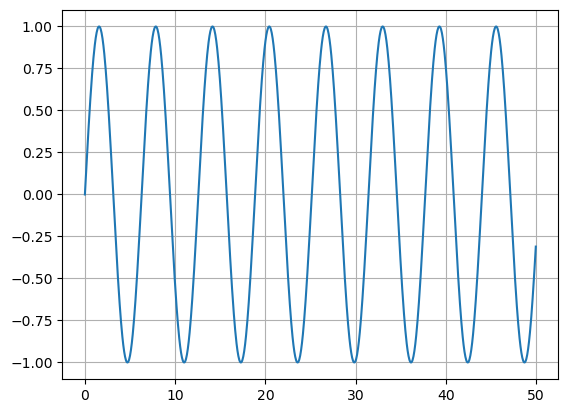

In [80]:
import matplotlib.pyplot as plt
plt.plot(time,value)
plt.grid()

plt.show()

### <font size=4><span id="8.3.4">8.3.4  `csv` 文件写入示例</span></font>

In [ ]:
import csv
with open("files\curveout.csv", 'w', encoding="utf-8-sig") as f:  # 源文件编码是 utf-8
    csv_writer = csv.writer(f)                                  # 调用 csv.reader 函数
    csv_writer.writerows(zip(time,value))

In [ ]:
# newline参数避免空行
with open("files\curveout1.csv", 'w', encoding="utf-8-sig",newline='') as f:  # 源文件编码是 utf-8
    csv_writer = csv.writer(f)                                  # 调用 csv.reader 函数
    csv_writer.writerows(zip(time,value))

### <font size=4><span id="8.3.5">8.3.5  `csv` 文件综合应用示例</span></font>

#### 奥运会数据分析
- Athletes_summer_games.csv
- Athletes_winter_games.csv

In [ ]:
# 打开文件看看具体内容

In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

with open(r"files\Athletes_summer_games.csv", 'r', encoding = 'utf-8') as f:
    csv_reader = csv.reader(f)
    csv_list = []
    for each in csv_reader:
        csv_list.append(each)
        
header = csv_list[0]
csv_list = csv_list[1:len(csv_list)]

##### 历届参赛男女比例

In [6]:
# 文件中包含了多少届奥运会？
games_in_csv_list = []
for each in csv_list:           # each 是一个列表.
    if (each[7] not in games_in_csv_list):
        games_in_csv_list.append(each[7])        # 第 8 列是奥运会的年份

# 去除 games_in_csv_list 中相同的元素，利用集合中元素的唯一性
games_in_csv_list = sorted(set(games_in_csv_list))

# 创建和初始化字典
number_of_female_athlete = {}     # 女运动员数量，结构为  年份:总人数
number_of_male_athlete = {}       # 男运动员数量，结构为  年份:总人数
female_athlete_name = {}          # 女运动名字，结构为  年份:所有女运动员名字列表
male_athlete_name = {}            # 男运动名字，结构为  年份:所有男运动员名字列表
for each in games_in_csv_list:    # 初始化
    female_athlete_name[each] = []
    male_athlete_name[each] = []

for each in csv_list:
    year = each[7]      # 获取每个运动员  参赛年份、性别、名字
    sex = each[2]
    name = each[1]
    if sex == 'M':      # 男、女
        male_athlete_name[year].append(name)
    else:
        female_athlete_name[year].append(name)

for year in female_athlete_name.keys():
    # 去除重复人员（一个人可以参加多个项目，因此 female_athlete_name[year] 里有相同的姓名
    number_of_female_athlete[year] = len(set(female_athlete_name[year]))            
    number_of_male_athlete[year] = len(set(male_athlete_name[year]))

# 计算比例
years = []
female_athlete_ratio = []
male_athlete_ratio = []
for each in number_of_female_athlete.keys():
    ratio = number_of_female_athlete[each] / (number_of_female_athlete[each] + number_of_male_athlete[each])
    female_athlete_ratio.append(ratio)
    male_athlete_ratio.append(1.0-ratio)
    years.append(each)

C:\Users\panzichao\AppData\Local\Temp\ipykernel_2940\2898941914.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


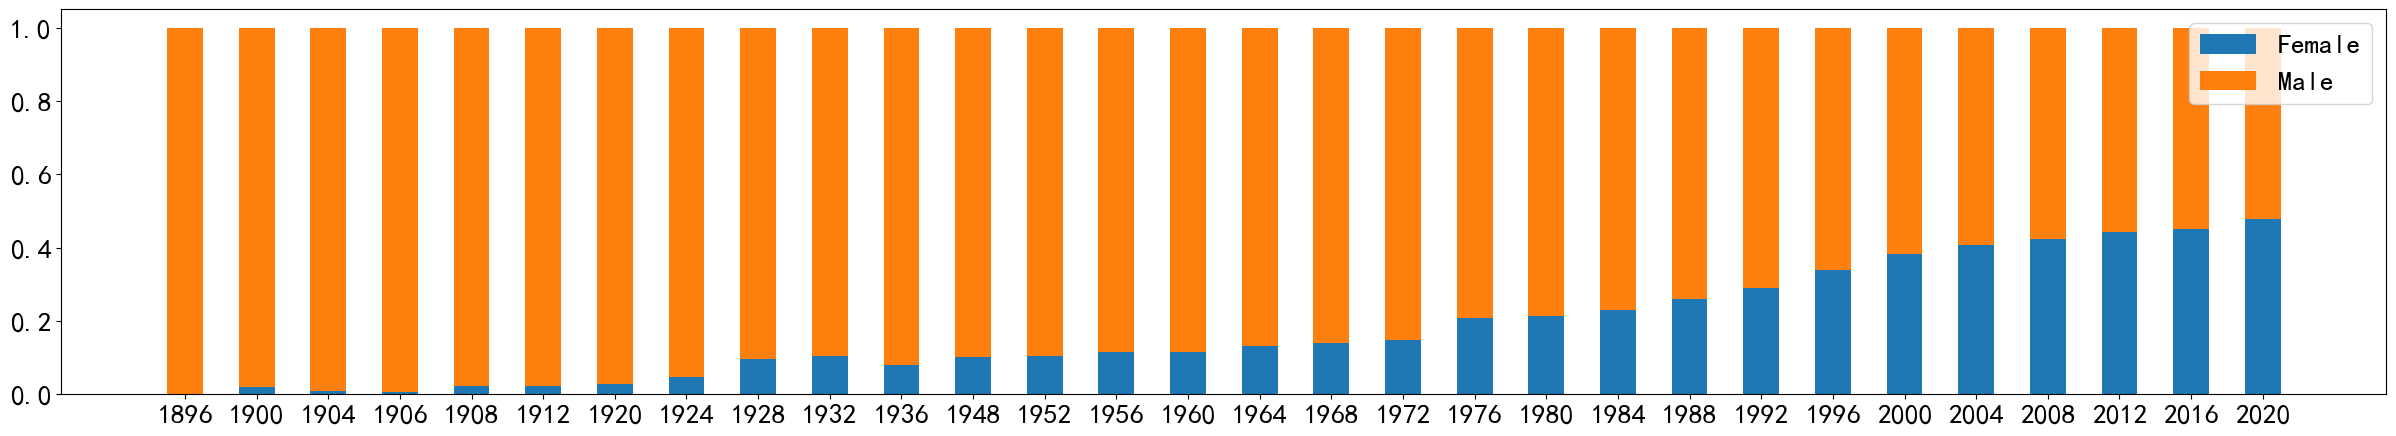

In [113]:
# 绘图
matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(30, 5), dpi=100)
width = 0.5
ax.bar(np.arange(len(female_athlete_ratio)), female_athlete_ratio, width=width, tick_label=years, label="Female")
ax.bar(np.arange(len(male_athlete_ratio)), male_athlete_ratio, bottom=female_athlete_ratio, width=width, tick_label=years, label="Male")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
fig.show()

#####  历届某个体育代表团运动员人数比例

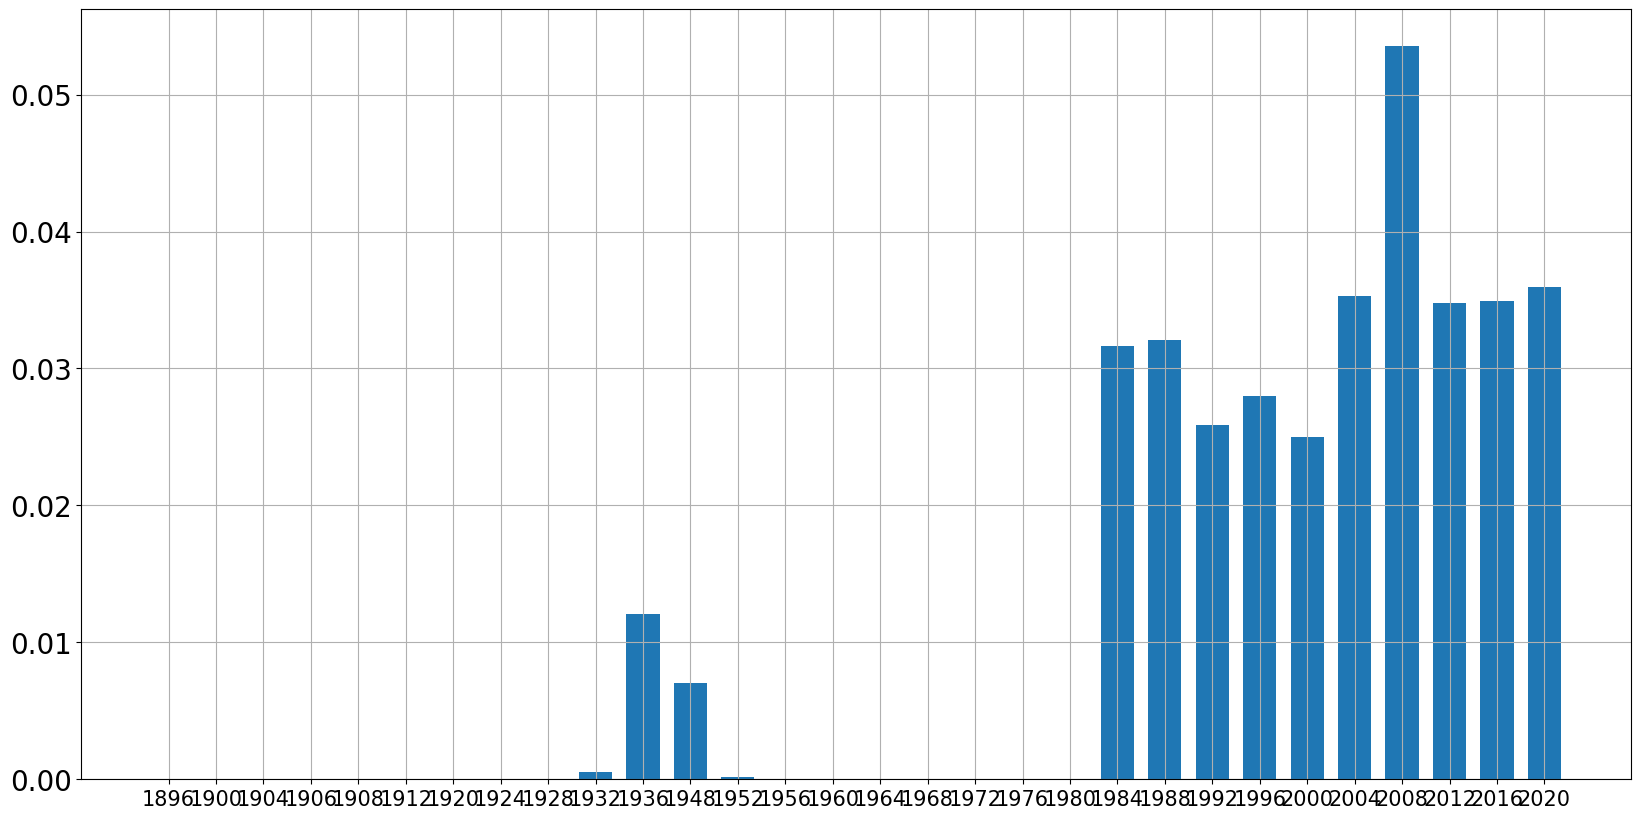

In [83]:
number_of_NOC_athlete = {}
NOC_athlete_name = {}
for each in games_in_csv_list:
    NOC_athlete_name[each] = []
    
for each in csv_list:
    year = each[7]
    NOC = each[5]       # 代表队
    name = each[1]
    if NOC == "CHN":
        NOC_athlete_name[year].append(name)

for year in NOC_athlete_name.keys():
    number_of_NOC_athlete[year] = len(set(NOC_athlete_name[year]))   

years = []
NOC_athlete_ratio = []
for each in number_of_NOC_athlete.keys():
    ratio = number_of_NOC_athlete[each] / (number_of_female_athlete[each] + number_of_male_athlete[each])
    NOC_athlete_ratio.append(ratio)
    years.append(each)
    
fig = plt.figure(figsize = (20,10))
plt.bar(years,NOC_athlete_ratio,0.7)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.grid()  # 生成网格

##### 每届奥运会某体育代表团金牌数占比

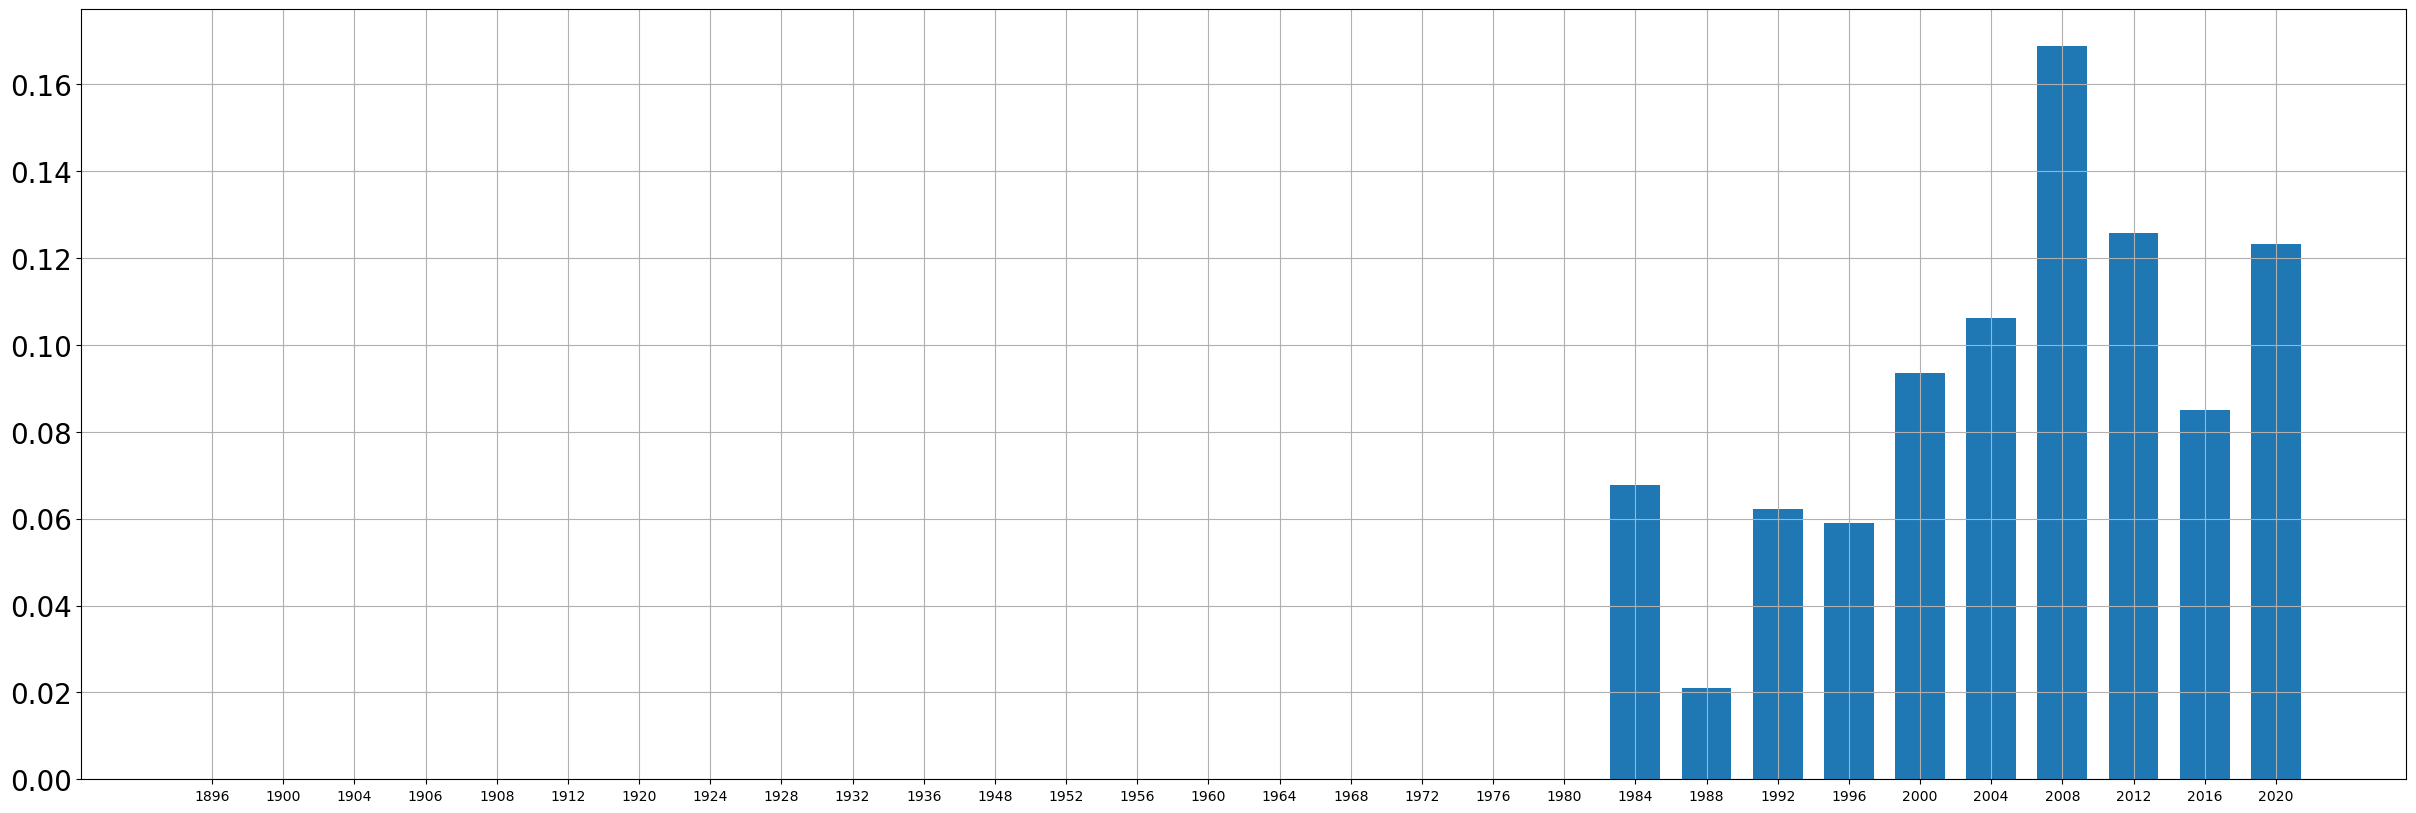

In [84]:
# 每届奥运会某体育代表团金牌数占比
target_noc = "CHN"     # 想看哪个代表队

# 创建和初始化字典
number_of_all_gold_medal = {}      # 年份:金牌总数
number_of_noc_gold_medal = {}      # 年份:某代表团获得的金牌总数
all_gold_medal_event = {}          # 年份:在哪些项目上获得的金牌（列表）
noc_gold_medal_event = {}          
for each in games_in_csv_list:
    noc_gold_medal_event[each] = []
    all_gold_medal_event[each] = []

for each in csv_list:
    year = each[7]
    NOC = each[5]
    event = each[11]    # 项目（一个小项产生一块金牌）
    medal = each[12]    # 拿的是什么牌
    if (medal == 'Gold'):
        all_gold_medal_event[year].append(event)
    if (NOC == target_noc) and (medal == 'Gold'):
        noc_gold_medal_event[year].append(event)

for year in noc_gold_medal_event.keys():
    number_of_all_gold_medal[year] = len(set(all_gold_medal_event[year]))
    number_of_noc_gold_medal[year] = len(set(noc_gold_medal_event[year]))
 
# plot
xData = []
yData = []
for year in number_of_all_gold_medal.keys():
    yData.append(number_of_noc_gold_medal[year]/number_of_all_gold_medal[year])
    xData.append(year)
    
fig = plt.figure(figsize = (30,10))
plt.bar(xData,yData,0.7)
plt.yticks(fontsize=20)
plt.grid()  # 生成网格

##### 每届奥运会某体育代表团所获金牌来自哪些大项（占比）
- 可用于分析某代表团的优势项目是什么
- 代码较长，解释一下原理

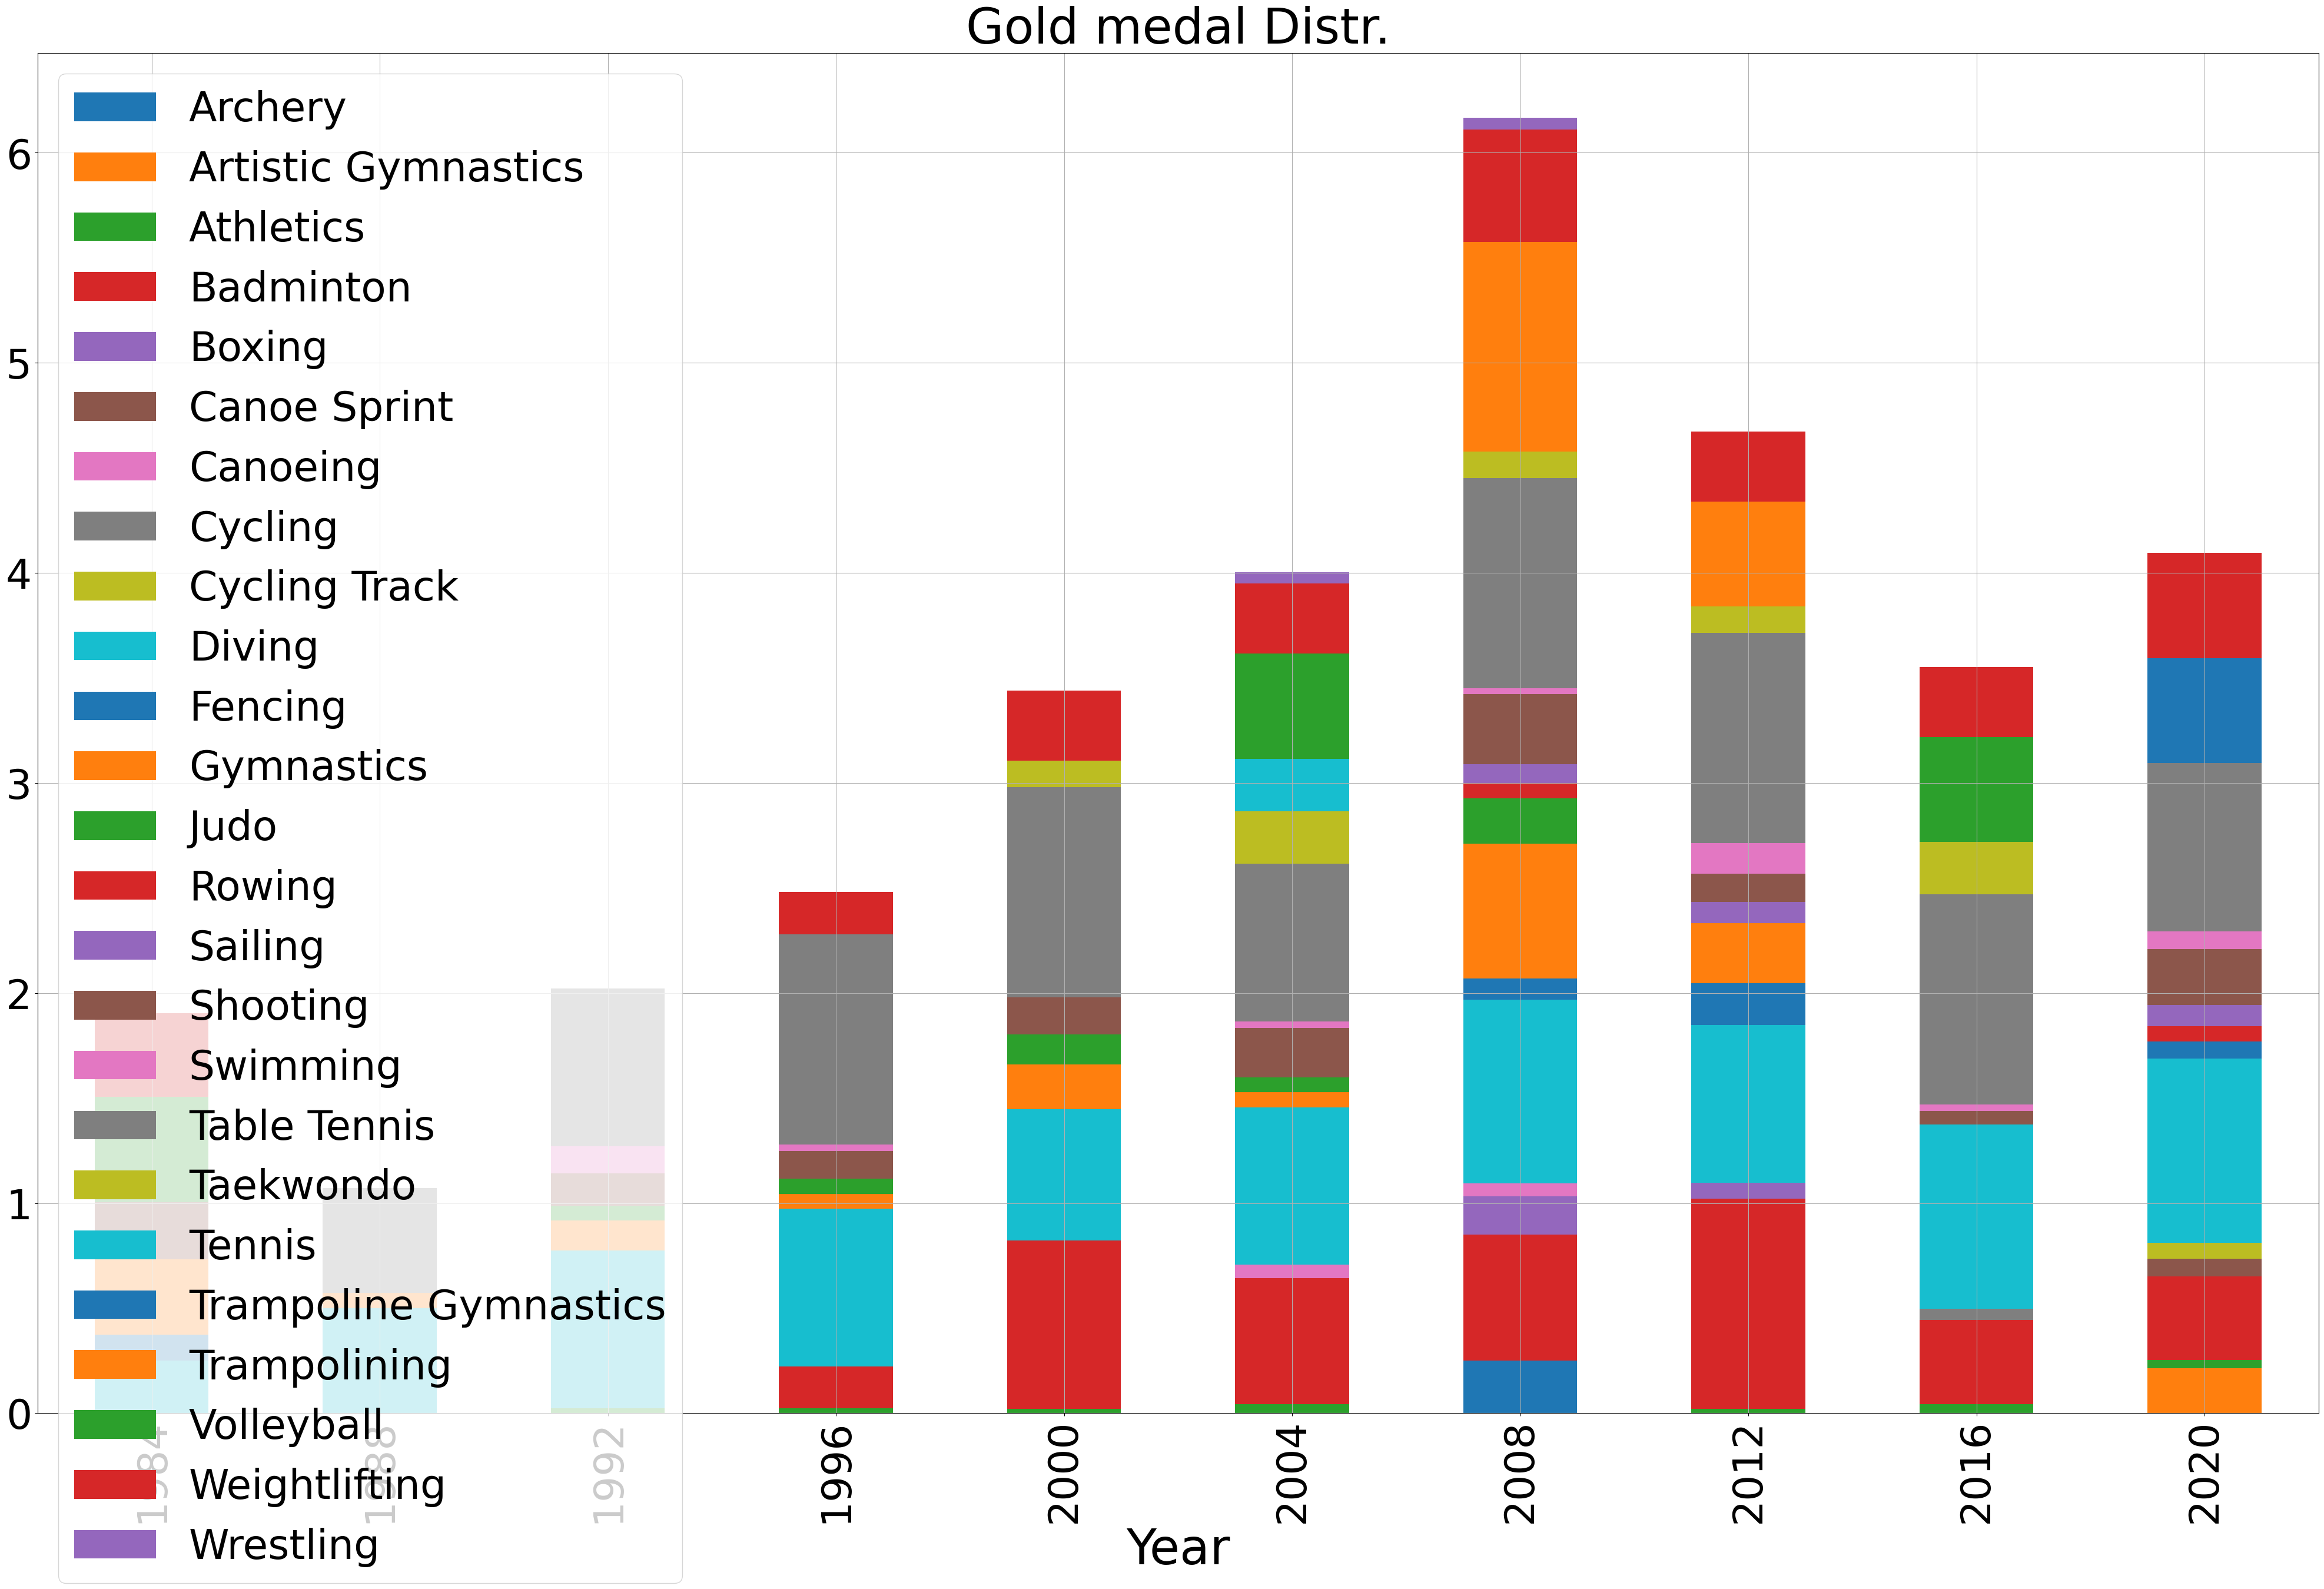

In [85]:
target_noc = "CHN"     # 想看哪个代表队

# 每届奥运会设置的大项（sport）小项（event）都不一样，因此要分别获取每一届的具体情况
# 历年比赛开设了哪些大项，所有代表团的情况
sport_in_all_games = {}
for year in games_in_csv_list:
    sport_in_all_games[year] = []
for each in csv_list:
    year = each[7]
    sport = each[10]
    sport_in_all_games[year].append(sport)
for year in sport_in_all_games.keys():
    sport_in_all_games[year] = sorted(set(sport_in_all_games[year]))
# 每个大项有多少金牌（一个小项产生一块金牌）
sport_event_of_each_game = {}
for each in games_in_csv_list:
    sport_event_of_each_game[each] = {}     # 字典嵌套，每届比赛的每个大项包含的小项名称
for year in sport_in_all_games.keys():
    for sport in sport_in_all_games[year]:              # sport_in_all_games[year] 是一个列表
        sport_event_of_each_game[year][sport] = []
for each in csv_list:
    year = each[7]
    sport = each[10]
    event = each[11]
    sport_event_of_each_game[year][sport].append(event)
for year in sport_in_all_games.keys():
    for sport in sport_in_all_games[year]: 
        sport_event_of_each_game[year][sport] = sorted(set(sport_event_of_each_game[year][sport]))      # 去除重复
sport_gold_number_of_each_game = {}
for each in games_in_csv_list:
    sport_gold_number_of_each_game[each] = {}     # 字典嵌套
for year in sport_in_all_games.keys():
    for sport in sport_in_all_games[year]:              # sport_in_all_games[year] 是一个列表
        sport_gold_number_of_each_game[year][sport] = len(sport_event_of_each_game[year][sport])
        
# 以下是某体育代表团的情况
# 历年比赛中，在哪些大项中拿过金牌，有些大项从来没拿过金牌就不统计了
noc_sport_with_gold_medal_in_all_games = {}
for year in games_in_csv_list:
    noc_sport_with_gold_medal_in_all_games[year] = []
for each in csv_list:
    NOC = each[5]
    year = each[7]
    sport = each[10]
    medal = each[12]
    if (NOC == target_noc) and (medal == 'Gold'):
        noc_sport_with_gold_medal_in_all_games[year].append(sport)
for year in noc_sport_with_gold_medal_in_all_games.keys():
    noc_sport_with_gold_medal_in_all_games[year] = sorted(set(noc_sport_with_gold_medal_in_all_games[year]))
# 历年比赛中，在哪些小项中拿过金牌（每个小项对应一块金牌）
noc_sport_event_with_gold_medal_of_each_game = {}
for year in games_in_csv_list:
    noc_sport_event_with_gold_medal_of_each_game[year] = {}     # 字典嵌套，每届比赛的每个大项包含的小项名称
for year in noc_sport_with_gold_medal_in_all_games.keys():
    for sport in noc_sport_with_gold_medal_in_all_games[year]:              # sport_in_all_games[year] 是一个列表
        noc_sport_event_with_gold_medal_of_each_game[year][sport] = []
for each in csv_list:
    year = each[7]
    sport = each[10]
    event = each[11]
    NOC = each[5]
    medal = each[12]
    if (NOC == target_noc) and (medal == 'Gold'):
        noc_sport_event_with_gold_medal_of_each_game[year][sport].append(event)
for year in noc_sport_event_with_gold_medal_of_each_game.keys():
    for sport in noc_sport_event_with_gold_medal_of_each_game[year]: 
        noc_sport_event_with_gold_medal_of_each_game[year][sport] = sorted(set(noc_sport_event_with_gold_medal_of_each_game[year][sport]))      # 去除重复
noc_sport_gold_number_of_each_game = {}
for each in games_in_csv_list:
    noc_sport_gold_number_of_each_game[each] = {}     
for year in noc_sport_with_gold_medal_in_all_games.keys():
    for sport in noc_sport_with_gold_medal_in_all_games[year]:              
        noc_sport_gold_number_of_each_game[year][sport] = len(noc_sport_event_with_gold_medal_of_each_game[year][sport])

# plot
# 从第一块金牌的那一届奥运会开始画图
# 先找到第一块金牌是在哪一届奥运会拿到的
for year in games_in_csv_list:
    count = 0
    for sport in noc_sport_with_gold_medal_in_all_games[year]:
        count = count + noc_sport_gold_number_of_each_game[year][sport]
    if (count > 0):
        start_year = year
        break

noc_sport_gold_medal_ratio_of_each_game = {}
for year in games_in_csv_list:
    if (year >= start_year):
        noc_sport_gold_medal_ratio_of_each_game[year] = {}
for year in games_in_csv_list:
    if (year >= start_year):
        for sport in noc_sport_with_gold_medal_in_all_games[year]:      
            noc_sport_gold_medal_ratio_of_each_game[year][sport] = noc_sport_gold_number_of_each_game[year][sport] / sport_gold_number_of_each_game[year][sport]
            
# 开始绘图
width = 0.5
years = []
for year in games_in_csv_list:
    if (year >= start_year):
        years.append(year)
        
labels = []
for year in noc_sport_with_gold_medal_in_all_games.keys():
    for sport in noc_sport_with_gold_medal_in_all_games[year]:
        labels.append(sport)
labels = sorted(set(labels))

data = [0.0]*len(years)
for i in range(len(years)):
    data[i] = [0.0]*(len(labels)+1)
    data[i][0] = years[i]

for year in years:
    year_index = years.index(year)
    for sport in noc_sport_with_gold_medal_in_all_games[year]:
        # 找到 sport 在 labels 中的位置
        sport_index = labels.index(sport)
        data[year_index][sport_index+1] = noc_sport_gold_medal_ratio_of_each_game[year][sport]

df = pd.DataFrame(data,columns=["Year"]+labels)

plt.rcParams.update({'font.size': 60})
fig = df.plot(x='Year', kind='bar', stacked=True, title='Gold medal Distr.', legend=False, figsize=(50,30), fontsize=50)
fig.axes.title.set_size(60)
plt.legend(labels, loc='upper left', fontsize=50)
plt.grid()  # 生成网格
plt.show()

## <font size=5><span id="8.4">8.4 二进制文件读取(pickle模块)</span></font>

- pickle.dump(obj, file, [,protocol])   
    - 函数的功能：将obj对象序列化存入已经打开的file中
    - protocal：如果该项省略，则默认为0。如果为负值或HIGHEST_PROTOCOL，则使用最高的协议版本。
- pickle.load(file)
    - 函数的功能：将file中的对象序列化读出。


In [20]:
import pickle
dir(pickle)

['ADDITEMS',
 'APPEND',
 'APPENDS',
 'BINBYTES',
 'BINBYTES8',
 'BINFLOAT',
 'BINGET',
 'BININT',
 'BININT1',
 'BININT2',
 'BINPERSID',
 'BINPUT',
 'BINSTRING',
 'BINUNICODE',
 'BINUNICODE8',
 'BUILD',
 'BYTEARRAY8',
 'DEFAULT_PROTOCOL',
 'DICT',
 'DUP',
 'EMPTY_DICT',
 'EMPTY_LIST',
 'EMPTY_SET',
 'EMPTY_TUPLE',
 'EXT1',
 'EXT2',
 'EXT4',
 'FALSE',
 'FLOAT',
 'FRAME',
 'FROZENSET',
 'FunctionType',
 'GET',
 'GLOBAL',
 'HIGHEST_PROTOCOL',
 'INST',
 'INT',
 'LIST',
 'LONG',
 'LONG1',
 'LONG4',
 'LONG_BINGET',
 'LONG_BINPUT',
 'MARK',
 'MEMOIZE',
 'NEWFALSE',
 'NEWOBJ',
 'NEWOBJ_EX',
 'NEWTRUE',
 'NEXT_BUFFER',
 'NONE',
 'OBJ',
 'PERSID',
 'POP',
 'POP_MARK',
 'PROTO',
 'PUT',
 'PickleBuffer',
 'PickleError',
 'Pickler',
 'PicklingError',
 'PyStringMap',
 'READONLY_BUFFER',
 'REDUCE',
 'SETITEM',
 'SETITEMS',
 'SHORT_BINBYTES',
 'SHORT_BINSTRING',
 'SHORT_BINUNICODE',
 'STACK_GLOBAL',
 'STOP',
 'STRING',
 'TRUE',
 'TUPLE',
 'TUPLE1',
 'TUPLE2',
 'TUPLE3',
 'UNICODE',
 'Unpickler',
 'Unpi

In [117]:
import pickle
my_list = {"姓名":"李雷", "性别":"男", "本科毕业学校":"同济大学"}
my_list

{'姓名': '李雷', '性别': '男', '本科毕业学校': '同济大学'}

In [119]:
pickle_file = open(r"files\my_list.bin",'wb')
pickle.dump(my_list, pickle_file)
pickle_file.close()
# 看看生成的文件

In [120]:
import pickle
pickle_file = open(r"files\my_list.bin",'rb')
my_list0 = pickle.load(pickle_file)
pickle_file.close()
print(my_list0)

{'姓名': '李雷', '性别': '男', '本科毕业学校': '同济大学'}


In [24]:
import pickle  
dataList = [[1, 1, 'yes'],  
            [1, 1, 'yes'],  
            [1, 0, 'no'],  
            [0, 1, 'no'],  
            [0, 1, 'no']]  
dataDic = { 0: [1, 2, 3, 4],  
            1: ('a', 'b'),  
            2: {'c':'yes','d':'no'}} 
fw = open(r'files\dataFile.txt','wb')
pickle.dump(dataList, fw, -1) 
pickle.dump(dataDic, fw)  
fw.close() 

In [25]:
#使用load()将数据从文件中序列化读出  
fr = open(r'files\dataFile.txt','rb')  
data1 = pickle.load(fr)  
print(data1)  
data2 = pickle.load(fr)  
print(data2)  
fr.close()

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
{0: [1, 2, 3, 4], 1: ('a', 'b'), 2: {'c': 'yes', 'd': 'no'}}


## <font size=5><span id="8.5">8.5 Excel文件读取</span></font>

- 扩展名xls的Excel文件用xlrd库读、xlwt库写Excel文件
- 扩展名xlsx的Excel文件使用openpyxl库读写Excel文件。
- 这里介绍 openpyxl库的使用，是第三方库必须安装、导入openpyxl 库。

在使用openpyxl库中，主要用到三个对象：
- （1）WorkBook工作簿，一个Excel文件包含多个sheet；
- （2）WorkSheet工作薄中的一张表，有若干行若干列组成；
- （3）Cell单元格，存储数据对象。

<img src="images\chapter08\excelfun.jpg">

In [86]:
# 
import openpyxl as pxl
#获得工作簿对象：
wb=pxl.load_workbook(r"files\namelist.xlsx")
# 获得工作表对象：
stnames = wb.sheetnames
stnames

['aha', 'Sheet2', 'Sheet3']

In [87]:
ws = wb[stnames[0]]
ws

<Worksheet "aha">

In [89]:
# 获取单元格
x=ws.cell(1,1).value
x

'数学'

In [90]:
ws.cell(1,1,"姓名")  #修改了值
wb.save(r"files\namelist.xlsx") #保存到文件
wb.close()  #退出

In [ ]:
wb.close()  #退出

In [ ]:
### import openpyxl as pxl
#获得工作簿对象：
wb=pxl.load_workbook(r"files\namelist0.xlsx")

# 获得工作表对象：
stnames = wb.sheetnames
ws = wb[stnames[0]]
maxcolumn, maxrow = ws.max_column, ws.max_row
print(maxrow, maxcolumn)
for i in range(maxrow-1):
    sumrow = 0
    for j in range(maxcolumn-2):
        #print(ws.cell(i+2,j+2).value,end=" ")
        sumrow += ws.cell(i+2,j+2).value
    #print(i+2,j+4)
    ws.cell(i+2,j+4,sumrow)
    #print(sumrow)
ws.cell(1,5,"总分")

for i in range(maxcolumn):
    sumcolumn = 0
    
    for j in range(maxrow-1):
        #print(j+2,i+2)
        sumcolumn += ws.cell(j+2,i+2).value
    sumcolumn = sumcolumn/(maxrow-1)
    ws.cell(maxrow+1,i+2,sumcolumn)
ws.cell(maxrow+1,1,"平均分")        

wb.save(r"files\namelistn.xlsx") #保存到文件
wb.close()  #退出

#### 例 利用 Flourish 做炫酷的 Bar Chart Race
网址：app.flourish.studio

我们要做什么：

 - 原始数据的格式 --> Python --> flourish 要求的格式

剩下的交给 flourish 完成

##### 全球主要国家/地区的GDP随时间的变化
- gdp_1960_2020.csv

In [ ]:
#### 打开看一下文件的内容

In [121]:
import csv
import openpyxl as pxl

with open(r"files\gdp_1960_2020.csv", 'r', encoding = 'utf-8') as f:
    csv_reader = csv.reader(f)
    raw_data = []
    for each in csv_reader:
        raw_data.append(each)
        
header = raw_data[0]
raw_data = raw_data[1:len(raw_data)]

# 去除错误数据和空数据
exist_wrong_record = True
while (exist_wrong_record == True):
    exist_wrong_record = False
    for record in raw_data:
        if (('N/A') in record) or ('' in record):
            exist_wrong_record = True
            break
    idx = raw_data.index(record)
    del raw_data[idx]

# 原始数据包含多少年
years = []
for record in raw_data:
    years.append(record[0])
years = sorted(set(years))

# 原始数据包含多少个国家/地区
regions = []
for record in raw_data:
    regions.append(record[2])
regions = sorted(set(regions))

gdp = {}
for year in years:
    gdp[year] = {}
    for region in regions:
        gdp[year][region] = 0

for record in raw_data:
    year = record[0]
    region = record[2]
    gdp[year][region] = float(record[4])

# 写入到 xlsx 文件中
wb = pxl.Workbook()                # 新建一个 xlsx 文件
ws = wb.active # 激活工作表（创建 xlsx，系统会默认创建一个 sheet1 工作表
ws.cell(row=1, column=1, value='Country/Region')
for i in range(len(years)):
    year = years[i]
    ws.cell(row=1, column=i+2, value=year)

for i in range(len(regions)):
    region = regions[i]
    ws.cell(row=i+2, column=1, value=region)

for i in range(len(regions)):
    region = regions[i]
    for j in range(len(years)):
        year = years[j]
        ws.cell(row=i+2, column=j+2, value=gdp[year][region]/100000000)
    
wb.save(r'files\gdp_flourish_data.xlsx')
wb.close()

## <font size=5><span id="8.6">8.6 扩展学习 —— 其它读取模块 (自学)</span></font>

- `xlrd` —— 读 Excel 文件 [(官网)](https://github.com/python-excel/xlrd)

- `xlwt` —— 写 Excel 文件 [(官网)](https://github.com/python-excel/xlwt)

- `pdfminer` —— 读 pdf 文件中的数据文本 [(官网)](https://github.com/euske/pdfminer)

- `lxml` —— 处理 HTML 和 XML 文件 [(官网)](https://lxml.de/)

- `codecs` —— 支持多国语言的处理，面向任意编码 [(官网)](https://docs.python.org/zh-cn/3.8/library/codecs.html)

- `json` —— 处理 json 文件 [(官网)](https://docs.python.org/zh-cn/3.8/library/json.html)
- `shutil` —— 更专业的文件操作工具模块 [(官网)](https://docs.python.org/3/library/shutil.html)

# 第8讲 结束

<img src="images\chapter08\IO-xmind.png">